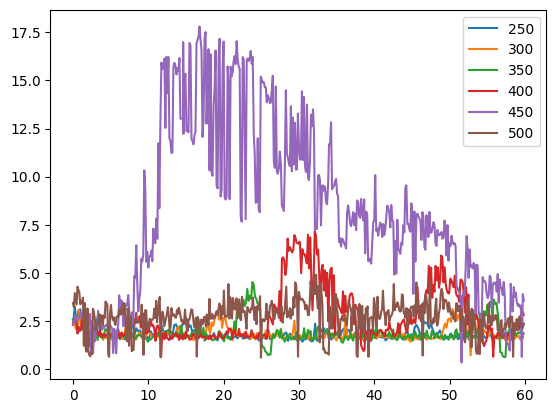

In [58]:
import pickle 
import os
from matplotlib import pyplot as plt
from collections import Counter
# root = "/home/azureuser/datadrive/nuance_mix_accelerator/experiments/no_async_server/"
root = "/home/azureuser/datadrive/nuance_mix_accelerator/experiments/async_server_B1/"
# root = "/home/azureuser/datadrive/nuance_mix_accelerator/experiments/async_server_local/"
import numpy as np
row = []
experiments = os.listdir(root)
for run in experiments:
    n_req = int(run.split("_")[3])
    with open(root+run, "rb") as f:
        resp_list = pickle.load(f)
    counter = Counter([eval(i[1].text)["answer"] if i[1].status_code==200 else "error_code_{}".format(i[1].status_code) for i in resp_list ])
    success_avg_time = np.mean([i[2] for i in resp_list if i[1].status_code==200 and eval(i[1].text)["answer"]!="RateLimitError"])
    success_med_time = np.median([i[2] for i in resp_list if i[1].status_code==200 and eval(i[1].text)["answer"]!="RateLimitError"])

    row.append([n_req, round(counter["error_code_500"]/n_req,4)*100, round(counter["RateLimitError"]/n_req, 4)*100, round(success_avg_time, 3), round(success_med_time, 3)])
    resp_list = sorted(resp_list, key=lambda x: x[0])
    x = [i[0]-resp_list[0][0] for i in resp_list]
    y = [i[2] for i in resp_list]
    plt.plot(x, y, label=run.split("_")[3])
plt.legend()
plt.show()

In [60]:
import pandas as pd
df = pd.DataFrame(row, columns=["n_requests", "500 error", "RateLimitError", "avg respond time", "median respond time"])
display(df)

,n_requests,500 error,RateLimitError,avg respond time,median respond time
0,250,0.00,0.00,1.812,1.724
1,300,0.33,0.00,1.842,1.743
2,350,3.71,0.29,1.922,1.759
3,400,3.75,6.00,2.752,2.060
4,450,14.44,10.67,8.616,7.754
5,500,8.40,6.40,2.965,2.878


In [27]:
with open("/home/azureuser/datadrive/nuance_mix_accelerator/experiments/async_server_B1/nuanceappservice_10_sec_10_call.pickle", "rb") as f:
    resp_list = pickle.load(f)
resp_list = sorted(resp_list, key=lambda x: x[0])

In [1]:
import numpy as np
n_req = 1000
s = np.random.normal(0.5, 0.5, int(1e6))
s = sorted(s)
mid = s[(s>=0) & (s<=1)]
left = s[s<0]
right = s[s>1]
n_pad = (len(mid)//n_req +1)*n_req - len(mid)
left_sample = n_pad//2
right_sample = n_pad - left_sample
s = np.hstack((left[-left_sample:], mid, right[:right_sample]))

s = s.reshape(n_req, len(s)//n_req).mean(axis=1)
import seaborn as sns
sns.displot(s, bins=20,kind="hist")
print(len(s))

In [88]:
len(s)

8

[3, 2, 1]